# ⚡ UK Historic Electricity Demand Analysis - Data Exploration

**Team Member(s)**: [Add your name here]  
**Objective**: Load and explore the UK Historic Electricity Demand dataset (2001-2025) to understand energy consumption patterns, seasonal trends, and grid dynamics.

## 📋 Overview
This notebook performs comprehensive analysis of the UK Historic Electricity Demand dataset containing 25 years of half-hourly electricity demand records. We'll examine demand patterns, renewable generation, interconnector flows, and seasonal variations.

---

## 1.1 Load & Inspect the Full UK Historic Electricity Dataset

This section loads all yearly CSV files (2001–2025) from the `Dataset_2_UK_Historic_Electricity_Demand_Data` directory and combines them into a single Pandas DataFrame for exploration.

### What the script does
- Locates all `.csv` files in the dataset folder.
- Reads each file into a DataFrame while tracking the source filename for debugging.
- Concatenates all yearly DataFrames into one combined dataset.
- Displays:
  - Basic shape and column names
  - A preview of the first 10 rows
  - `info()` summary (dtypes, non-null counts)
  - Numeric summary statistics
  - A small sample of unique values for each column
  - Missing-value percentages for all columns

### Notes
- Reading all files at once may use significant memory depending on your system.
- If memory errors occur, consider switching to a chunked or streaming loading approach.


In [4]:
# 1.1 Load & inspect the full electricity dataset (all yearly CSVs)
from pathlib import Path
import pandas as pd
from IPython.display import display

# ===== CONFIGURE YOUR YEAR RANGE HERE =====
LOAD_START_YEAR = 2001  # Set start year (2001-2025)
LOAD_END_YEAR = 2025    # Set end year (2001-2025)
# ==========================================

# Dataset folder
data_dir = Path("../Dataset_2_UK_Historic_Electricity_Demand_Data")
csv_files = sorted(data_dir.glob("*.csv"))

if not csv_files:
    print("No CSV files found in:", data_dir)
else:
    # Filter CSV files based on year range
    year_filtered_files = []
    for fpath in csv_files:
        # Extract year from filename (e.g., demanddata_2015.csv -> 2015)
        try:
            year = int(fpath.stem.split('_')[-1])
            if LOAD_START_YEAR <= year <= LOAD_END_YEAR:
                year_filtered_files.append(fpath)
        except:
            # If can't extract year, include the file
            year_filtered_files.append(fpath)
    
    csv_files = year_filtered_files
    
    if not csv_files:
        print(f"No CSV files found for years {LOAD_START_YEAR}-{LOAD_END_YEAR} in:", data_dir)
    else:
        print(f"Found {len(csv_files)} CSV files for years {LOAD_START_YEAR}-{LOAD_END_YEAR}. Reading into a combined DataFrame.")
        print("Warning: this may use substantial memory depending on your machine; consider running a chunked/streaming pipeline if you run out of RAM.")

        dfs = []
        for fpath in csv_files:
            try:
                print(f"Reading {fpath.name}...")
                df_part = pd.read_csv(fpath, low_memory=False)
                # keep provenance for debugging
                df_part['source_file'] = fpath.name
                dfs.append(df_part)
            except Exception as exc:
                print(f"Warning: failed to read {fpath.name}: {exc}")

        if not dfs:
            print("No data could be read from the CSV files.")
        else:
            df_all = pd.concat(dfs, ignore_index=True)
            print(f"\n✅ Combined DataFrame loaded successfully for years {LOAD_START_YEAR}-{LOAD_END_YEAR}.")
            print("Shape:", df_all.shape)
            print("\nColumn names:\n", df_all.columns.tolist())

            # Preview - show one row from each year
            print("\n📊 Sample: One row from each year")
            # Try to extract year from a date column
            date_cols = [col for col in df_all.columns if any(k in col.lower() for k in ['date', 'time', 'timestamp', 'settlement'])]
            if date_cols:
                temp_df = df_all.copy()
                temp_df['_year'] = pd.to_datetime(temp_df[date_cols[0]], errors='coerce').dt.year
                sample_by_year = temp_df.dropna(subset=['_year']).groupby('_year').first().reset_index()
                print(f"Years in dataset: {sorted(sample_by_year['_year'].unique())}")
                display(sample_by_year.drop(columns=['_year'], errors='ignore'))
            else:
                # Fallback to source_file grouping
                sample_by_file = df_all.groupby('source_file').first().reset_index()
                print(f"Files in dataset: {len(sample_by_file)}")
                display(sample_by_file)

            # Info
            print("\nDataFrame info():")
            df_all.info()

            # Numeric overview
            print("\nBasic numeric statistics:")
            display(df_all.describe(include='number'))

            # Categorical/unique preview (first 10 examples per column)
            print("\nUnique sample values per column:")
            for col in df_all.columns:
                uniques = pd.unique(df_all[col].dropna())[:10]
                print(f"- {col}: {len(pd.unique(df_all[col].dropna()))} unique values, examples -> {list(uniques)}")

            # Missing-value percentages
            print("\nMissing-value percentages per column:")
            print((df_all.isna().mean()).sort_values(ascending=False))


Found 25 CSV files for years 2001-2025. Reading into a combined DataFrame.
Reading demanddata_2001.csv...
Reading demanddata_2002.csv...
Reading demanddata_2003.csv...
Reading demanddata_2004.csv...
Reading demanddata_2005.csv...
Reading demanddata_2006.csv...
Reading demanddata_2007.csv...
Reading demanddata_2008.csv...
Reading demanddata_2009.csv...
Reading demanddata_2010.csv...
Reading demanddata_2011.csv...
Reading demanddata_2012.csv...
Reading demanddata_2013.csv...
Reading demanddata_2014.csv...
Reading demanddata_2015.csv...
Reading demanddata_2016.csv...
Reading demanddata_2017.csv...
Reading demanddata_2018.csv...
Reading demanddata_2019.csv...
Reading demanddata_2020.csv...
Reading demanddata_2021.csv...
Reading demanddata_2022.csv...
Reading demanddata_2012.csv...
Reading demanddata_2013.csv...
Reading demanddata_2014.csv...
Reading demanddata_2015.csv...
Reading demanddata_2016.csv...
Reading demanddata_2017.csv...
Reading demanddata_2018.csv...
Reading demanddata_2019.cs

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW,GREENLINK_FLOW,source_file
0,2001-01-01,1,38631,NaN,34060,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,demanddata_2001.csv
1,2002-01-01,1,39544,NaN,35034,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,demanddata_2002.csv
2,2003-01-01,1,36977,NaN,32817,NaN,NaN,NaN,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,demanddata_2003.csv
3,2004-01-01,1,39462,NaN,35168,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,demanddata_2004.csv
4,2005-01-01,1,37313,0.0,33019,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,demanddata_2005.csv
5,2006-01-01,1,38596,39660.0,34982,NaN,NaN,NaN,NaN,0,...,NaN,NaN,-169.0,NaN,NaN,NaN,NaN,NaN,NaN,demanddata_2006.csv
6,2007-01-01,1,35628,36409.0,32120,0.0,0.0,NaN,NaN,0,...,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,demanddata_2007.csv
7,2008-01-01,1,36164,36847.0,32466,59.0,1163.0,NaN,NaN,0,...,NaN,NaN,-75.0,NaN,NaN,NaN,NaN,NaN,NaN,demanddata_2008.csv
8,2025-01-01,1,21036,26215.0,19918,5405.0,6606.0,0.0,19273.0,0,...,-1026.0,1.0,-232.0,-386.0,-558.0,96.0,0.0,241.0,0.0,demanddata_2025.csv



DataFrame info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434014 entries, 0 to 434013
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SETTLEMENT_DATE            434014 non-null  object 
 1   SETTLEMENT_PERIOD          434014 non-null  int64  
 2   ND                         434014 non-null  int64  
 3   TSD                        363886 non-null  float64
 4   ENGLAND_WALES_DEMAND       434014 non-null  int64  
 5   EMBEDDED_WIND_GENERATION   328846 non-null  float64
 6   EMBEDDED_WIND_CAPACITY     328846 non-null  float64
 7   EMBEDDED_SOLAR_GENERATION  293758 non-null  float64
 8   EMBEDDED_SOLAR_CAPACITY    293758 non-null  float64
 9   NON_BM_STOR                434014 non-null  int64  
 10  PUMP_STORAGE_PUMPING       434014 non-null  int64  
 11  SCOTTISH_TRANSFER          48334 non-null   float64
 12  IFA_FLOW                   434014 non-null  int64  
 13  IFA2_FLOW 

,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,...,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW,GREENLINK_FLOW
count,434014.000000,434014.000000,363886.000000,434014.000000,328846.000000,328846.000000,293758.000000,293758.000000,434014.000000,434014.000000,...,434014.000000,293758.000000,293758.000000,363886.000000,293758.000000,293758.000000,118462.000000,118462.000000,118462.000000,118462.000000
mean,24.500115,33356.066355,33266.062044,30276.803767,1214.371730,4144.955061,967.462261,9378.041956,5.085905,312.552316,...,949.465600,83.916384,482.953404,-125.896984,-57.327766,179.188509,493.492825,173.029258,97.572150,-35.320145
std,13.853742,8520.564917,8841.033067,7677.431497,1044.560271,2211.207279,1897.304504,6367.711070,33.336164,528.055352,...,1042.264276,385.699200,557.187687,215.982772,263.244667,437.418147,674.809907,512.891171,433.212859,136.707253
min,1.000000,12803.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24.000000,0.000000,...,-2071.000000,-1030.000000,-1215.000000,-505.000000,-585.000000,-1024.000000,-1455.000000,-1028.000000,-1465.000000,-539.000000
25%,12.250000,26489.000000,27070.000000,24063.000000,459.000000,2019.000000,0.000000,2541.750000,0.000000,6.000000,...,312.000000,0.000000,0.000000,-276.000000,-220.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,32976.000000,32728.000000,29906.000000,925.000000,4260.000000,0.000000,12000.000000,0.000000,11.000000,...,1221.000000,0.000000,708.000000,-129.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,39692.000000,39438.000000,36011.750000,1664.000000,6527.000000,984.750000,13755.000000,0.000000,486.000000,...,1900.000000,0.000000,994.000000,0.000000,0.000000,429.000000,1259.000000,521.000000,0.000000,0.000000
max,50.000000,60333.000000,60560.000000,54430.000000,5962.000000,6622.000000,14035.000000,20993.000000,893.000000,2025.000000,...,2194.000000,1016.000000,1143.000000,499.000000,504.000000,1033.000000,1419.000000,1002.000000,1436.000000,506.000000



Unique sample values per column:
- SETTLEMENT_DATE: 9042 unique values, examples -> ['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08', '2001-01-09', '2001-01-10']
- SETTLEMENT_PERIOD: 50 unique values, examples -> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- ND: 39473 unique values, examples -> [38631, 39808, 40039, 39339, 38295, 38445, 37192, 35583, 34485, 33382]
- TSD: 36960 unique values, examples -> [0.0, 34286.0, 33885.0, 35082.0, 36028.0, 36179.0, 35921.0, 35362.0, 34607.0, 34347.0]
- ENGLAND_WALES_DEMAND: 35730 unique values, examples -> [34060, 35370, 35680, 35029, 34047, 34177, 33087, 31635, 30569, 29374]
- EMBEDDED_WIND_GENERATION: 5634 unique values, examples -> [0.0, 458.0, 450.0, 435.0, 409.0, 419.0, 405.0, 399.0, 406.0, 423.0]
- EMBEDDED_WIND_CAPACITY: 186 unique values, examples -> [0.0, 1129.0, 1147.0, 1163.0, 1167.0, 1171.0, 1178.0, 1182.0, 1213.0, 1215.0]
- EMBEDDED_SOLAR_GENERATION: 9979 unique values, examples -> [

## 1.2 Column Summary Utility & Dataset Profiling

This section defines a helper function, `col_summary`, to generate a compact overview of each column in a DataFrame. It is then applied to either the full combined electricity dataset (`df_all`) or a sample dataset (`df_sample`), depending on what is available in the notebook.

### What the `col_summary` function reports
For each column, the function computes:
- **Inferred dtype** — as interpreted by Pandas  
- **Non-null percentage** — proportion of rows with valid data  
- **Unique value count** — total number of distinct non-null entries  
- **Example values** — up to three sample unique values for quick inspection  

The output is presented as a sortable Pandas DataFrame for easier data auditing.

### Logic for running the summary
- If `df_all` exists in memory, the summary is run on the full combined dataset.
- Otherwise, if `df_sample` exists, the summary runs on the sample.
- If neither exists, the script prints guidance on how to load a CSV for standalone summary testing.

This step helps verify column consistency, detect anomalies, and prepare for cleaning or transformations in subsequent stages.


In [5]:
# 1.2 Column summary helper and summary for electricity sample/full
import pandas as pd
from IPython.display import display

def col_summary(df, sample_uniques=3):
    rows = []
    for c in df.columns:
        s = df[c]
        nn_pct = 100 * s.notna().mean()
        try:
            uniq_cnt = int(s.nunique(dropna=True))
        except Exception:
            uniq_cnt = None
        examples = list(s.dropna().astype(str).unique()[:sample_uniques])
        rows.append({
            "column": c,
            "dtype_inferred": str(s.dtype),
            "non_null_%": round(nn_pct, 2),
            "unique_count": uniq_cnt,
            "examples": examples
        })
    return pd.DataFrame(rows).sort_values("column")

# Run summary on the most complete DataFrame available
if 'df_all' in globals():
    print("Running `col_summary` on `df_all` (combined dataset)")
    summary = col_summary(df_all)
    display(summary)
elif 'df_sample' in globals():
    print("Running `col_summary` on `df_sample` (combined sample)")
    summary = col_summary(df_sample)
    display(summary)
else:
    print("No DataFrame named `df_all` or `df_sample` found in the notebook state.\nIf you want to summarise a CSV directly, run:")
    print("from pathlib import Path; import pandas as pd; df = pd.read_csv('Dataset_2_UK_Historic_Electricity_Demand_Data/demanddata_2001.csv', nrows=500)")


Running `col_summary` on `df_all` (combined dataset)


,column,dtype_inferred,non_null_%,unique_count,examples
14,BRITNED_FLOW,float64,67.68,2126,"[0.0, -1.0, 51.0]"
16,EAST_WEST_FLOW,float64,67.68,1058,"[0.0, -1.0, -2.0]"
19,ELECLINK_FLOW,float64,27.29,2029,"[0.0, 66.0, 499.0]"
8,EMBEDDED_SOLAR_CAPACITY,float64,67.68,3373,"[0.0, 17.0, 18.0]"
7,EMBEDDED_SOLAR_GENERATION,float64,67.68,9979,"[0.0, 1.0, 2.0]"
6,EMBEDDED_WIND_CAPACITY,float64,75.77,186,"[0.0, 1129.0, 1147.0]"
5,EMBEDDED_WIND_GENERATION,float64,75.77,5634,"[0.0, 458.0, 450.0]"
4,ENGLAND_WALES_DEMAND,int64,100.00,35730,"[34060, 35370, 35680]"
21,GREENLINK_FLOW,float64,27.29,966,"[0.0, -20.0, -3.0]"
13,IFA2_FLOW,float64,67.68,2035,"[0.0, -2.0, -1.0]"


## 2.0 Clean Column Names and Data Types for Electricity Demand (Chunk-Based Processing)


In [6]:
# 2.0 — Clean column names and data types for electricity demand (chunk)
import pandas as pd
import numpy as np
from pathlib import Path
from IPython.display import display

def clean_electricity_data_chunk(chunk):
    """Clean a chunk/dataframe of electricity demand records.

    Actions:
    - normalize column names (lowercase, underscores)
    - parse a timestamp-like column to datetime if present
    - extract date/time features (year, month, day, hour, minute)
    - coerce demand/load columns to numeric (float64)
    - strip text columns and preserve provenance

    The function enforces consistent dtypes for numeric columns (float64) and uses
    pandas nullable `Int64` for integer-like date fields to reduce parquet schema
    mismatches across chunks.
    """
    df = chunk.copy()

    # 1) Normalize column names
    def _clean_colname(c):
        c = str(c).strip()
        c = c.replace(" ", "_")
        c = c.replace("/", "_")
        c = c.replace("-", "_")
        c = c.replace("(", "_").replace(")", "_")
        # lowercase and collapse repeated underscores
        c = "_".join([p for p in c.lower().split("_") if p])
        return c

    df.columns = [_clean_colname(c) for c in df.columns]

    # 2) Identify a timestamp column (typical names: date, time, timestamp, datetime, settlement_date)
    ts_candidates = [c for c in df.columns if any(k in c for k in ['date', 'time', 'timestamp', 'datetime', 'settlement'])]
    ts_col = ts_candidates[0] if ts_candidates else None

    if ts_col is not None:
        # parse datetimes defensively
        df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce')
        # use pandas nullable integer dtype for date parts
        df['year'] = df[ts_col].dt.year.astype('Int64')
        df['month'] = df[ts_col].dt.month.astype('Int64')
        df['day'] = df[ts_col].dt.day.astype('Int64')
        df['hour'] = df[ts_col].dt.hour.astype('Int64')
        df['minute'] = df[ts_col].dt.minute.astype('Int64')
        df['date'] = df[ts_col].dt.date
    else:
        df['year'] = pd.Series([pd.NA] * len(df), dtype='Int64')
        df['month'] = pd.Series([pd.NA] * len(df), dtype='Int64')
        df['day'] = pd.Series([pd.NA] * len(df), dtype='Int64')
        df['hour'] = pd.Series([pd.NA] * len(df), dtype='Int64')
        df['minute'] = pd.Series([pd.NA] * len(df), dtype='Int64')
        df['date'] = pd.Series([pd.NA] * len(df))

    # 3) Coerce obvious numeric demand/load columns to numeric (float64)
    demand_candidates = [c for c in df.columns if any(k in c for k in ['demand', 'load', 'mw', 'mwh', 'kw', 'kwh', 'total', 'value'])]

    for c in demand_candidates:
        df[c] = pd.to_numeric(df[c], errors='coerce').astype('float64')

    # Also coerce other numeric-like columns to float64 for consistent schema
    for c in df.columns:
        if c not in demand_candidates and c not in ['year', 'month', 'day', 'hour', 'minute']:
            # try to coerce columns that look numeric
            if df[c].dtype == object:
                # heuristic: if >50% of non-null values are numeric, coerce
                nonnull = df[c].dropna()
                if len(nonnull) > 0:
                    # cast to string first to safely use string operations
                    nonnull_str = nonnull.astype(str)
                    num_like = nonnull_str.str.replace(r"[^0-9eE+-.]", "", regex=True).str.match(r"^[+-]?[0-9]*\.?[0-9]+(?:[eE][+-]?[0-9]+)?$")
                    if num_like.mean() > 0.5:
                        df[c] = pd.to_numeric(df[c], errors='coerce').astype('float64')

    # 4) Normalise text columns: strip
    for col in df.select_dtypes(include=['object']).columns:
        try:
            df[col] = df[col].astype(str).str.strip()
        except Exception:
            pass

    # 5) Keep a stable primary demand column if found, and create `demand_value` alias
    primary_demand = None
    for c in demand_candidates:
        if 'demand' in c:
            primary_demand = c
            break
    if primary_demand is None and demand_candidates:
        primary_demand = demand_candidates[0]

    if primary_demand is not None:
        df['demand_value'] = df[primary_demand]
    else:
        df['demand_value'] = pd.Series([pd.NA] * len(df), dtype='float64')

    # 6) Preserve provenance
    if 'source_file' not in df.columns:
        df['source_file'] = pd.Series([pd.NA] * len(df))
    else:
        df['source_file'] = df['source_file'].astype(str)

    # Ensure consistent dtypes: cast numeric columns to float64 and date parts to Int64
    for c in df.select_dtypes(include=['number']).columns:
        df[c] = df[c].astype('float64')

    for dcol in ['year', 'month', 'day', 'hour', 'minute']:
        if dcol in df.columns:
            df[dcol] = df[dcol].astype('Int64')

    return df

# Test the cleaner on available data: prefer `df_all` (full read), then `df_sample`, then read first CSV
if 'df_all' in globals():
    df_test = df_all.head(1000)
    print("Testing `clean_electricity_data_chunk` on `df_all.head(1000)`")
elif 'df_sample' in globals():
    df_test = df_sample
    print("Testing `clean_electricity_data_chunk` on `df_sample`")
else:
    # try reading the first CSV file as a fallback
    data_dir = Path("../Dataset_2_UK_Historic_Electricity_Demand_Data")
    csv_files = sorted(data_dir.glob("*.csv"))
    if csv_files:
        print(f"Reading a small fallback sample from {csv_files[0].name}")
        df_test = pd.read_csv(csv_files[0], nrows=500)
    else:
        df_test = None
        print("No data available to test the cleaning function.")

if df_test is not None:
    df_cleaned_sample = clean_electricity_data_chunk(df_test)
    print("✅ Cleaning function created and tested!")
    print(f"Original columns: {list(df_test.columns)[:20]}")
    print(f"New columns: {list(df_cleaned_sample.columns)[:30]}")
    print(f"New shape: {df_cleaned_sample.shape}")
    display(df_cleaned_sample.head())


Testing `clean_electricity_data_chunk` on `df_all.head(1000)`
✅ Cleaning function created and tested!
Original columns: ['SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'ND', 'TSD', 'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION', 'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION', 'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING', 'SCOTTISH_TRANSFER', 'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW', 'EAST_WEST_FLOW', 'NEMO_FLOW', 'NSL_FLOW', 'ELECLINK_FLOW']
New columns: ['settlement_date', 'settlement_period', 'nd', 'tsd', 'england_wales_demand', 'embedded_wind_generation', 'embedded_wind_capacity', 'embedded_solar_generation', 'embedded_solar_capacity', 'non_bm_stor', 'pump_storage_pumping', 'scottish_transfer', 'ifa_flow', 'ifa2_flow', 'britned_flow', 'moyle_flow', 'east_west_flow', 'nemo_flow', 'nsl_flow', 'eleclink_flow', 'viking_flow', 'greenlink_flow', 'source_file', 'year', 'month', 'day', 'hour', 'minute', 'date', 'demand_value']
New shape: (1000, 30)


,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,viking_flow,greenlink_flow,source_file,year,month,day,hour,minute,date,demand_value
0,2001-01-01,1.0,38631.0,NaN,34060.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,demanddata_2001.csv,2001,1,1,0,0,2001-01-01,34060.0
1,2001-01-01,2.0,39808.0,NaN,35370.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,demanddata_2001.csv,2001,1,1,0,0,2001-01-01,35370.0
2,2001-01-01,3.0,40039.0,NaN,35680.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,demanddata_2001.csv,2001,1,1,0,0,2001-01-01,35680.0
3,2001-01-01,4.0,39339.0,NaN,35029.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,demanddata_2001.csv,2001,1,1,0,0,2001-01-01,35029.0
4,2001-01-01,5.0,38295.0,NaN,34047.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,demanddata_2001.csv,2001,1,1,0,0,2001-01-01,34047.0


## 2.1 — Create strategic subset for electricity (streaming → parquet) with reservoir sampling



In [10]:
# 2.1 Create strategic subset for electricity (streaming -> parquet) with reservoir sampling
from pathlib import Path
import pandas as pd
import random
import math


def create_strategic_subset_elec(csv_dir,
                                 start_year=2001,
                                 end_year=2025,
                                 out_dir='data/interim',
                                 sample_n=500,
                                 chunksize=200_000,
                                 parquet_engine_preference=('pyarrow', 'fastparquet')):
    """Stream all CSVs in `csv_dir`, clean chunks using `clean_electricity_data_chunk`,
    write a cleaned full dataset.

    Uses reservoir sampling during streaming to produce unbiased sample (memory-bounded).
    Now with schema standardization to handle column evolution across years.
    """
    csv_dir = Path(csv_dir)
    out_dir = Path(out_dir)
    out_dir.mkdir(parents=True, exist_ok=True)

    full_stem = 'elec_cleaned_full'
    full_parquet = out_dir / f"{full_stem}.parquet"
    full_csv_out = out_dir / f"{full_stem}.csv"
    full_sample_path = out_dir / f"{full_stem}_sample.csv"

    # Parquet engine detection
    parquet_engine = None
    for eng in parquet_engine_preference:
        try:
            import importlib
            importlib.import_module(eng)
            parquet_engine = eng
            break
        except Exception:
            continue

    use_parquet = parquet_engine is not None

    # Setup pyarrow writers if available
    parquet_writer_full = None
    pa = None
    pq = None
    if use_parquet and parquet_engine == 'pyarrow':
        try:
            import pyarrow as pa
            import pyarrow.parquet as pq
        except Exception:
            use_parquet = False

    total_written = 0
    first_write_full = True

    # Pre-check existence
    full_exists = (use_parquet and full_parquet.exists()) if use_parquet else full_csv_out.exists()

    if full_exists:
        print(f"Full cleaned output already exists; will skip writing: {full_parquet if use_parquet else full_csv_out}")

    # Reservoir for streaming unbiased sample
    full_reservoir = []
    full_count = 0

    # ===== SCHEMA DETECTION: Scan all files to get complete column set =====
    master_schema = None
    all_columns = set()
    
    csv_files = sorted(csv_dir.glob('*.csv'))
    if not csv_files:
        print(f"No CSV files found in {csv_dir}")
        return {}

    if not full_exists:
        print("🔍 Phase 1: Detecting complete schema across all years...")
        for fpath in csv_files:
            try:
                # Read just first chunk to get column names
                sample_chunk = pd.read_csv(fpath, nrows=100, low_memory=False)
                sample_cleaned = clean_electricity_data_chunk(sample_chunk)
                all_columns.update(sample_cleaned.columns)
            except Exception as exc:
                print(f"Warning: could not scan {fpath.name}: {exc}")
        
        # Sort columns for consistent ordering
        all_columns = sorted(list(all_columns))
        print(f"✅ Detected {len(all_columns)} unique columns across all years")
        
        print("\n⚙️ Phase 2: Processing and writing data with standardized schema...")
        
        # Iterate all CSV files and stream their chunks
        for f_i, fpath in enumerate(csv_files):
            try:
                for i, chunk in enumerate(pd.read_csv(fpath, chunksize=chunksize, low_memory=False)):
                    chunk_cleaned = clean_electricity_data_chunk(chunk)

                    # ===== SCHEMA STANDARDIZATION: Add missing columns with proper dtype =====
                    import numpy as np
                    for col in all_columns:
                        if col not in chunk_cleaned.columns:
                            # Infer dtype from existing columns: use appropriate NaN for each type
                            if col in ['year', 'month', 'day', 'hour', 'minute']:
                                chunk_cleaned[col] = pd.Series([pd.NA] * len(chunk_cleaned), dtype='Int64')
                            elif col in ['date', 'settlement_date', 'source_file']:
                                chunk_cleaned[col] = None  # Will be treated as null strings
                            else:
                                # Use numpy nan for float columns (PyArrow compatible)
                                chunk_cleaned[col] = np.nan
                    
                    # Reorder columns to match master schema
                    chunk_cleaned = chunk_cleaned[all_columns]

                    # ===== write to full cleaned output (all rows) =====
                    try:
                        if use_parquet and parquet_engine == 'pyarrow':
                            table_full = pa.Table.from_pandas(chunk_cleaned)
                            if parquet_writer_full is None:
                                # Establish schema from first standardized chunk
                                master_schema = table_full.schema
                                parquet_writer_full = pq.ParquetWriter(str(full_parquet), master_schema)
                            parquet_writer_full.write_table(table_full)
                        else:
                            if first_write_full:
                                chunk_cleaned.to_csv(full_csv_out, index=False, mode='w', na_rep='NaN')
                            else:
                                chunk_cleaned.to_csv(full_csv_out, index=False, header=False, mode='a', na_rep='NaN')
                        first_write_full = False
                        total_written += len(chunk_cleaned)
                    except Exception as e:
                        print(f'Warning: failed to write chunk from {fpath.name}:', e)

                    # ===== update reservoir for unbiased sampling =====
                    for _, row in chunk_cleaned.iterrows():
                        full_count += 1
                        if len(full_reservoir) < sample_n:
                            full_reservoir.append(row.to_dict())
                        else:
                            s = random.randint(1, full_count)
                            if s <= sample_n:
                                idx = random.randint(0, sample_n - 1)
                                full_reservoir[idx] = row.to_dict()

                    # periodic progress
                    if (i + 1) % 10 == 0:
                        print(f"Processed chunk {i+1} of file {fpath.name}. Total rows so far: {total_written}")
            except Exception as exc:
                print(f"Warning: failed to stream {fpath.name}: {exc}")

        print(f"\n✅ Phase 2 complete: Processed all {len(csv_files)} files")

    # Close writer
    try:
        if use_parquet and parquet_engine == 'pyarrow':
            if parquet_writer_full is not None:
                parquet_writer_full.close()
    except Exception:
        pass

    # Persist reservoir sample to CSV
    try:
        if len(full_reservoir) > 0:
            pd.DataFrame(full_reservoir).head(sample_n).to_csv(full_sample_path, index=False, na_rep='NaN')
        else:
            pd.DataFrame().to_csv(full_sample_path, index=False, na_rep='NaN')
    except Exception as e:
        print('Warning: failed to persist reservoir sample due to:', e)
        pd.DataFrame().to_csv(full_sample_path, index=False, na_rep='NaN')

    result = {
        'full_parquet': str(full_parquet) if use_parquet else None,
        'full_csv': str(full_csv_out) if not use_parquet else None,
        'full_sample': str(full_sample_path),
        'rows_written': int(total_written)
    }

    print(f"Done. Total rows written: {total_written}")
    if result['full_parquet']:
        print(f"Full cleaned Parquet file: {result['full_parquet']}")
    else:
        print(f"Full cleaned CSV fallback file: {result['full_csv']}")
    print(f"Sample file: {result['full_sample']}")

    return result


print('create_strategic_subset_elec ready: streams all CSVs in folder, writes cleaned full dataset (parquet preferred), and creates unbiased sample (reservoir sampling).')

create_strategic_subset_elec ready: streams all CSVs in folder, writes cleaned full dataset (parquet preferred), and creates unbiased sample (reservoir sampling).


## 2.2 Run the streaming ETL for electricity and verify outputs




In [11]:
# 2.2 Runner: execute the streaming ETL for electricity and verify outputs
# Run this cell after `clean_electricity_data_chunk` and `create_strategic_subset_elec`
from pathlib import Path

try:
    print("Starting create_strategic_subset_elec for full dataset (this will stream and write files)...")
    res = create_strategic_subset_elec("../Dataset_2_UK_Historic_Electricity_Demand_Data")
    print('\nresult:', res)

    out_paths = []
    if res.get('full_parquet'):
        out_paths.append(Path(res['full_parquet']))
    elif res.get('full_csv'):
        out_paths.append(Path(res['full_csv']))

    if res.get('full_sample'):
        out_paths.append(Path(res['full_sample']))

    exist_map = {str(p): p.exists() for p in out_paths}
    print('\nOutputs existence:')
    for p, exists in exist_map.items():
        print(f"- {p}: {exists}")

    interim = Path('data/interim')
    if interim.exists():
        listing = sorted([p.name for p in interim.iterdir()])
    else:
        listing = []
    print('\nContents of data/interim:', listing)

except Exception as e:
    print('Runner failed with exception:', e)
    raise


Starting create_strategic_subset_elec for full dataset (this will stream and write files)...
🔍 Phase 1: Detecting complete schema across all years...


/var/folders/f0/_tj0pt9x4031t82dhd03xkz00000gn/T/ipykernel_88362/1567972675.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce')
/var/folders/f0/_tj0pt9x4031t82dhd03xkz00000gn/T/ipykernel_88362/1567972675.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce')
/var/folders/f0/_tj0pt9x4031t82dhd03xkz00000gn/T/ipykernel_88362/1567972675.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce')
/var/folders/f0/_tj0pt

✅ Detected 30 unique columns across all years

⚙️ Phase 2: Processing and writing data with standardized schema...


/var/folders/f0/_tj0pt9x4031t82dhd03xkz00000gn/T/ipykernel_88362/1567972675.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce')
/var/folders/f0/_tj0pt9x4031t82dhd03xkz00000gn/T/ipykernel_88362/1567972675.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce')
/var/folders/f0/_tj0pt9x4031t82dhd03xkz00000gn/T/ipykernel_88362/1567972675.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce')
/var/folders/f0/_tj0pt


✅ Phase 2 complete: Processed all 25 files
Done. Total rows written: 434014
Full cleaned Parquet file: data/interim/elec_cleaned_full.parquet
Sample file: data/interim/elec_cleaned_full_sample.csv

result: {'full_parquet': 'data/interim/elec_cleaned_full.parquet', 'full_csv': None, 'full_sample': 'data/interim/elec_cleaned_full_sample.csv', 'rows_written': 434014}

Outputs existence:
- data/interim/elec_cleaned_full.parquet: True
- data/interim/elec_cleaned_full_sample.csv: True

Contents of data/interim: ['elec_cleaned_full.parquet', 'elec_cleaned_full_sample.csv']




## 3.0 Visualisations — Key Insights

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# ===============================
# Load cleaned electricity data (OPTIMIZED)
# ===============================
parquet_file = Path("data/interim/elec_cleaned_full.parquet")

# Show file size
if parquet_file.exists():
    file_size_mb = parquet_file.stat().st_size / (1024 * 1024)
    print(f"📁 Parquet file size: {file_size_mb:.1f} MB")
else:
    print("⚠️ Parquet file not found. Run section 2.2 first to generate it.")

# OPTIMIZED: Use filters to read only 2020-2025 data directly from parquet
# This is much faster than loading everything then filtering
print("\n⏳ Loading 2020-2025 data with parquet filters (faster)...")

df = pd.read_parquet(
    parquet_file,
    filters=[('year', '>=', 2001), ('year', '<=', 2025)]
)

print(f"✅ Loaded filtered data: {df.shape}")
print(f"\nYear range in data: {df['year'].min()} to {df['year'].max()}")
print(f"Columns available: {df.columns.tolist()}")
print("\nSample data:")

df.head()

📁 Parquet file size: 12.6 MB

⏳ Loading 2020-2025 data with parquet filters (faster)...
✅ Loaded filtered data: (434014, 30)

Year range in data: 2001 to 2025
Columns available: ['britned_flow', 'date', 'day', 'demand_value', 'east_west_flow', 'eleclink_flow', 'embedded_solar_capacity', 'embedded_solar_generation', 'embedded_wind_capacity', 'embedded_wind_generation', 'england_wales_demand', 'greenlink_flow', 'hour', 'ifa2_flow', 'ifa_flow', 'minute', 'month', 'moyle_flow', 'nd', 'nemo_flow', 'non_bm_stor', 'nsl_flow', 'pump_storage_pumping', 'scottish_transfer', 'settlement_date', 'settlement_period', 'source_file', 'tsd', 'viking_flow', 'year']

Sample data:
✅ Loaded filtered data: (434014, 30)

Year range in data: 2001 to 2025
Columns available: ['britned_flow', 'date', 'day', 'demand_value', 'east_west_flow', 'eleclink_flow', 'embedded_solar_capacity', 'embedded_solar_generation', 'embedded_wind_capacity', 'embedded_wind_generation', 'england_wales_demand', 'greenlink_flow', 'hour'

,britned_flow,date,day,demand_value,east_west_flow,eleclink_flow,embedded_solar_capacity,embedded_solar_generation,embedded_wind_capacity,embedded_wind_generation,...,non_bm_stor,nsl_flow,pump_storage_pumping,scottish_transfer,settlement_date,settlement_period,source_file,tsd,viking_flow,year
0,NaN,2001-01-01,1,34060.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,862.0,NaN,2001-01-01,1.0,None,NaN,NaN,2001
1,NaN,2001-01-01,1,35370.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,153.0,NaN,2001-01-01,2.0,None,NaN,NaN,2001
2,NaN,2001-01-01,1,35680.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,18.0,NaN,2001-01-01,3.0,None,NaN,NaN,2001
3,NaN,2001-01-01,1,35029.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,9.0,NaN,2001-01-01,4.0,None,NaN,NaN,2001
4,NaN,2001-01-01,1,34047.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,211.0,NaN,2001-01-01,5.0,None,NaN,NaN,2001


### 3.1 Inspect Full Parquet File Contents

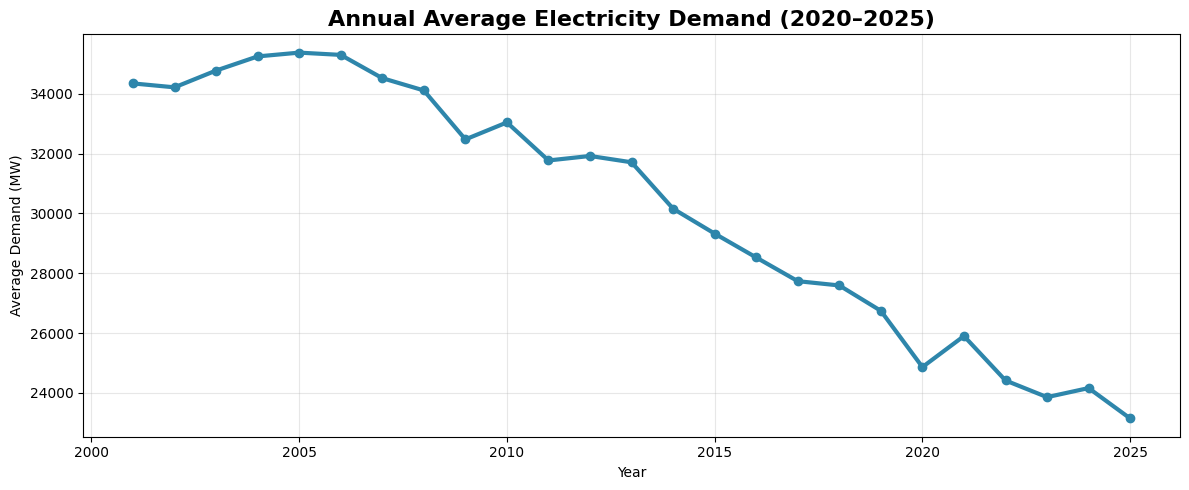

year
2001    34342.791210
2002    34212.124715
2003    34773.351884
2004    35245.387864
2005    35372.218893
2006    35296.158276
2007    34518.956849
2008    34108.108265
2009    32471.539212
2010    33039.477740
2011    31768.103368
2012    31918.176742
2013    31706.781107
2014    30155.179110
2015    29323.276826
2016    28525.159495
2017    27734.085902
2018    27590.907249
2019    26742.608790
2020    24863.024989
2021    25900.071975
2022    24415.462557
2023    23857.903539
2024    24161.055726
2025    23146.535029
Name: demand_value, dtype: float64

Year-over-year statistics:


In [35]:
plt.figure(figsize=(12,5))

# Use demand_value column (primary demand metric from cleaning function)
annual = df.groupby("year")["demand_value"].mean()

plt.plot(annual.index, annual.values, marker="o", linewidth=3, color="#2E86AB")
plt.title("Annual Average Electricity Demand (2020–2025)", fontsize=16, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Average Demand (MW)")
plt.grid(alpha=0.3)

plt.tight_layout()

plt.show()
print(annual)

print(f"\nYear-over-year statistics:")

Lowest demand month: Aug (26311.14 MW)

Peak demand month: Jan (35348.72 MW)


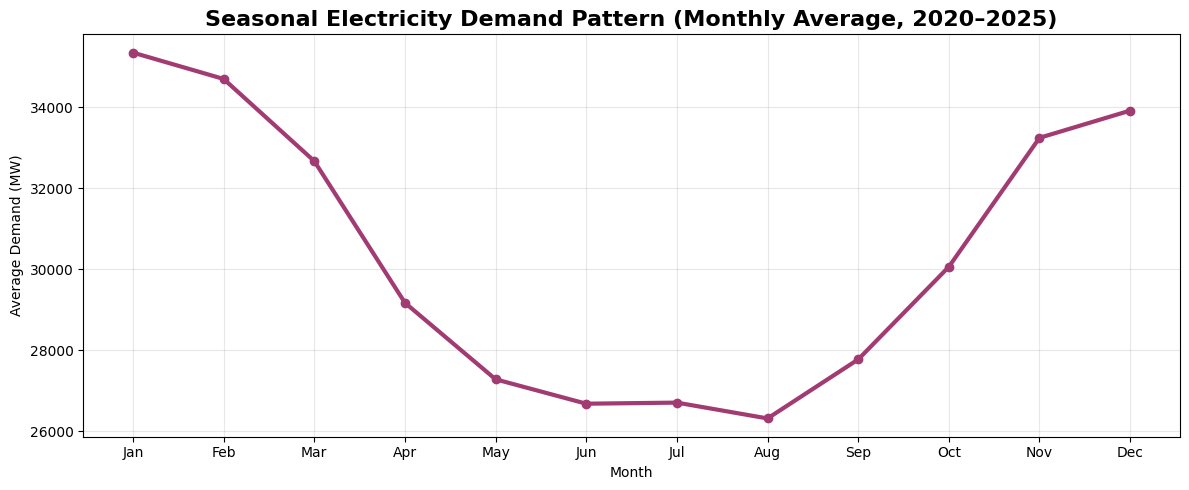

In [36]:
plt.figure(figsize=(12,5))

# Monthly seasonal pattern
monthly = df.groupby("month")["demand_value"].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(monthly.index, monthly.values, marker="o", linewidth=3, color="#A23B72")
plt.title("Seasonal Electricity Demand Pattern (Monthly Average, 2020–2025)", fontsize=16, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Average Demand (MW)")

plt.xticks(range(1,13), month_names)

plt.grid(alpha=0.3)
print(f"Lowest demand month: {month_names[monthly.idxmin()-1]} ({monthly.min():.2f} MW)")

plt.tight_layout()
print(f"\nPeak demand month: {month_names[monthly.idxmax()-1]} ({monthly.max():.2f} MW)")

plt.show()

### 3.5 Yearly Demand Trends — Full 25-Year Analysis

Compare demand trends across all 25 years to identify long-term patterns, policy impacts, and technological changes.

/var/folders/f0/_tj0pt9x4031t82dhd03xkz00000gn/T/ipykernel_49309/1804446378.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='decade_label', y='demand_value', ax=axes[0, 1], palette='Set2')
/var/folders/f0/_tj0pt9x4031t82dhd03xkz00000gn/T/ipykernel_49309/1804446378.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  peak_offpeak = df.groupby("year").apply(lambda x: x['demand_value'].quantile(0.95) - x['demand_value'].quantile(0.05))
/var/folders/f0/_tj0pt9x4031t82dhd03xkz00000gn/T/ipykernel_49309/1804446378.py:32: FutureWarning: DataFram

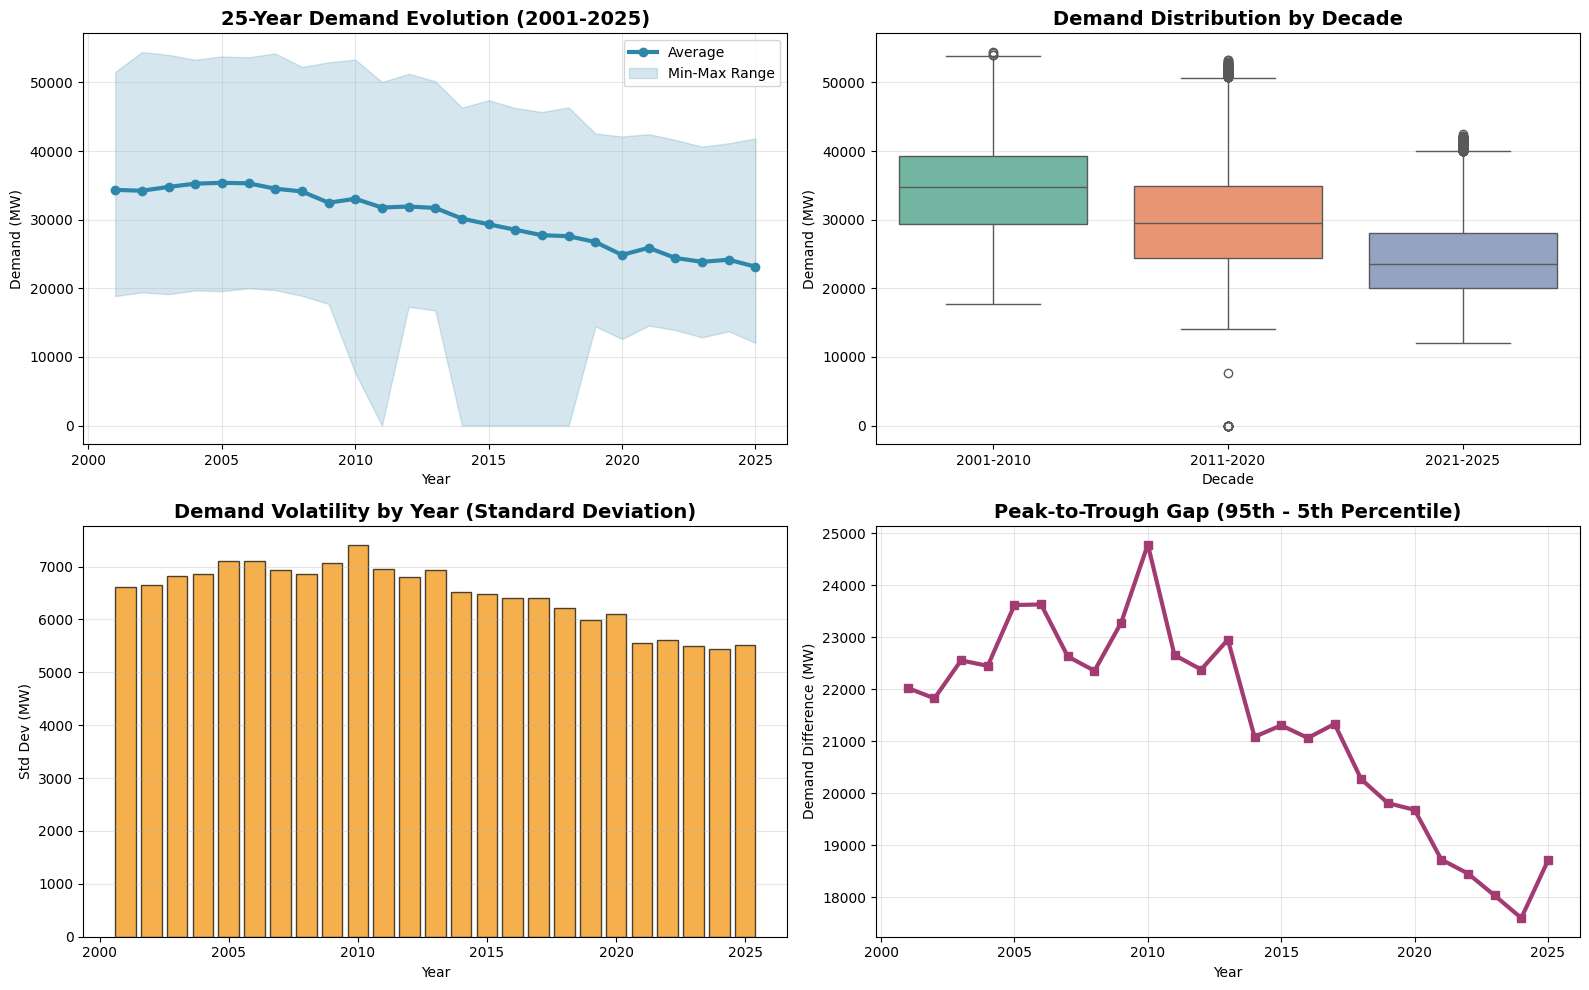


📊 Key Insights:
   - Highest average demand year: 2005 (35372.22 MW)
   - Lowest average demand year: 2025 (23146.54 MW)
   - Most volatile year: 2010 (σ = 7401.12 MW)
   - Most stable year: 2024 (σ = 5444.53 MW)
   - Overall demand trend: -11196.26 MW change from 2001 to 2025


In [37]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Yearly demand trend with min/max envelope
yearly_stats = df.groupby("year")["demand_value"].agg(['mean', 'min', 'max', 'std'])
axes[0, 0].plot(yearly_stats.index, yearly_stats['mean'], marker="o", linewidth=3, color="#2E86AB", label='Average')
axes[0, 0].fill_between(yearly_stats.index, yearly_stats['min'], yearly_stats['max'], alpha=0.2, color="#2E86AB", label='Min-Max Range')
axes[0, 0].set_title("25-Year Demand Evolution (2001-2025)", fontsize=14, fontweight="bold")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Demand (MW)")
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Demand distribution by decade
df['decade'] = (df['year'] // 10) * 10
decade_labels = {2000: '2001-2010', 2010: '2011-2020', 2020: '2021-2025'}
df['decade_label'] = df['decade'].map(decade_labels)
import seaborn as sns
sns.boxplot(data=df, x='decade_label', y='demand_value', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title("Demand Distribution by Decade", fontsize=14, fontweight="bold")
axes[0, 1].set_xlabel("Decade")
axes[0, 1].set_ylabel("Demand (MW)")
axes[0, 1].grid(alpha=0.3, axis='y')

# 3. Yearly volatility (standard deviation)
axes[1, 0].bar(yearly_stats.index, yearly_stats['std'], color='#F18F01', alpha=0.7, edgecolor='black')
axes[1, 0].set_title("Demand Volatility by Year (Standard Deviation)", fontsize=14, fontweight="bold")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Std Dev (MW)")
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Peak vs Off-Peak demand gap over years
peak_offpeak = df.groupby("year").apply(lambda x: x['demand_value'].quantile(0.95) - x['demand_value'].quantile(0.05))
axes[1, 1].plot(peak_offpeak.index, peak_offpeak.values, marker="s", linewidth=3, color="#A23B72")
axes[1, 1].set_title("Peak-to-Trough Gap (95th - 5th Percentile)", fontsize=14, fontweight="bold")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Demand Difference (MW)")
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Key Insights:")
print(f"   - Highest average demand year: {yearly_stats['mean'].idxmax()} ({yearly_stats['mean'].max():.2f} MW)")
print(f"   - Lowest average demand year: {yearly_stats['mean'].idxmin()} ({yearly_stats['mean'].min():.2f} MW)")
print(f"   - Most volatile year: {yearly_stats['std'].idxmax()} (σ = {yearly_stats['std'].max():.2f} MW)")
print(f"   - Most stable year: {yearly_stats['std'].idxmin()} (σ = {yearly_stats['std'].min():.2f} MW)")
print(f"   - Overall demand trend: {yearly_stats['mean'].iloc[-1] - yearly_stats['mean'].iloc[0]:.2f} MW change from 2001 to 2025")

### 3.6 Renewable Energy & Interconnector Analysis

Analyze embedded generation patterns and cross-border electricity flows to understand the changing energy landscape.

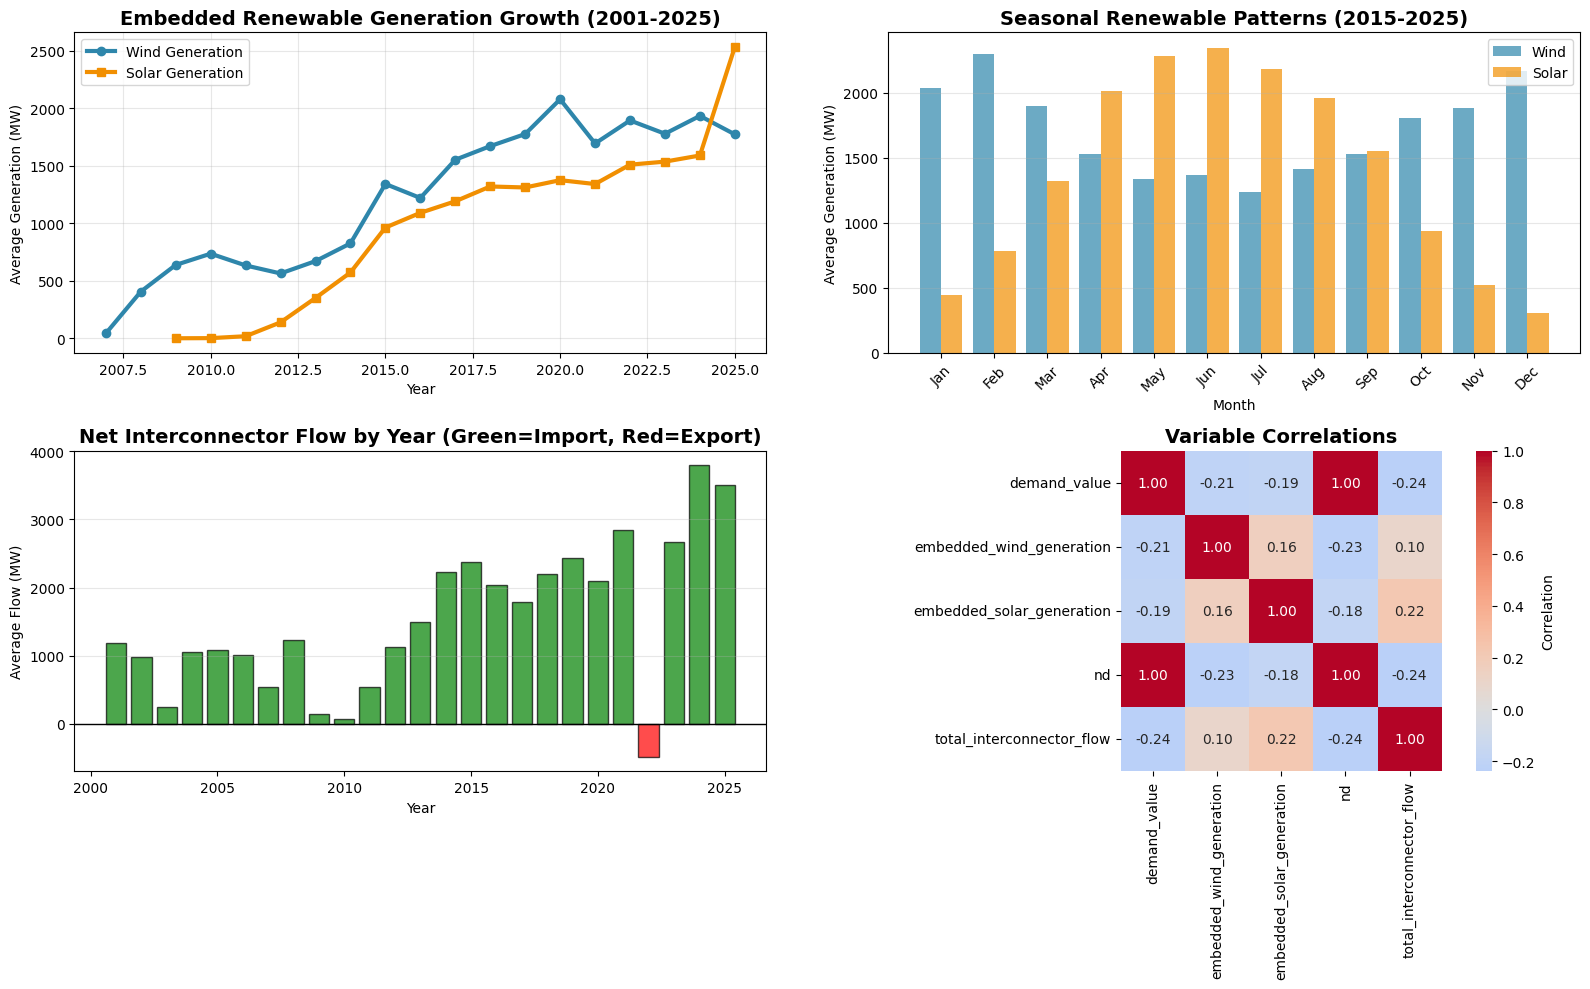


📊 Renewable Energy Insights:
   - Wind generation growth: nan MW (2001→2025)
   - Solar generation growth: nan MW (2001→2025)

📊 Interconnector Insights:
   - Years as net importer: 24
   - Years as net exporter: 1
   - Current status (2025): Importer


In [38]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Embedded wind and solar generation growth over years
renewable_cols = ['embedded_wind_generation', 'embedded_solar_generation']
renewable_data = df.groupby('year')[renewable_cols].mean()

axes[0, 0].plot(renewable_data.index, renewable_data['embedded_wind_generation'], 
                marker='o', linewidth=3, color='#2E86AB', label='Wind Generation')
axes[0, 0].plot(renewable_data.index, renewable_data['embedded_solar_generation'], 
                marker='s', linewidth=3, color='#F18F01', label='Solar Generation')
axes[0, 0].set_title("Embedded Renewable Generation Growth (2001-2025)", fontsize=14, fontweight="bold")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Average Generation (MW)")
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Monthly renewable patterns (for recent years with data)
recent_years = df[df['year'] >= 2015]
renewable_monthly = recent_years.groupby('month')[renewable_cols].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[0, 1].bar(renewable_monthly.index - 0.2, renewable_monthly['embedded_wind_generation'], 
               width=0.4, label='Wind', color='#2E86AB', alpha=0.7)
axes[0, 1].bar(renewable_monthly.index + 0.2, renewable_monthly['embedded_solar_generation'], 
               width=0.4, label='Solar', color='#F18F01', alpha=0.7)
axes[0, 1].set_title("Seasonal Renewable Patterns (2015-2025)", fontsize=14, fontweight="bold")
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Average Generation (MW)")
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names, rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3, axis='y')

# 3. Interconnector flows (net imports/exports)
interconnector_cols = [col for col in df.columns if 'flow' in col.lower() and col != 'demand_value']
if interconnector_cols:
    # Sum all interconnector flows (positive = import, negative = export)
    df['total_interconnector_flow'] = df[interconnector_cols].sum(axis=1)
    interconnector_yearly = df.groupby('year')['total_interconnector_flow'].mean()
    
    colors = ['green' if x >= 0 else 'red' for x in interconnector_yearly.values]
    axes[1, 0].bar(interconnector_yearly.index, interconnector_yearly.values, color=colors, alpha=0.7, edgecolor='black')
    axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
    axes[1, 0].set_title("Net Interconnector Flow by Year (Green=Import, Red=Export)", fontsize=14, fontweight="bold")
    axes[1, 0].set_xlabel("Year")
    axes[1, 0].set_ylabel("Average Flow (MW)")
    axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Correlation heatmap of key variables
correlation_cols = ['demand_value', 'embedded_wind_generation', 'embedded_solar_generation', 'nd']
if 'total_interconnector_flow' in df.columns:
    correlation_cols.append('total_interconnector_flow')

corr_matrix = df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, ax=axes[1, 1], cbar_kws={'label': 'Correlation'})
axes[1, 1].set_title("Variable Correlations", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

print(f"\n📊 Renewable Energy Insights:")
if not renewable_data['embedded_wind_generation'].isna().all():
    wind_growth = renewable_data['embedded_wind_generation'].iloc[-1] - renewable_data['embedded_wind_generation'].iloc[0]
    print(f"   - Wind generation growth: {wind_growth:.2f} MW (2001→2025)")
if not renewable_data['embedded_solar_generation'].isna().all():
    solar_growth = renewable_data['embedded_solar_generation'].iloc[-1] - renewable_data['embedded_solar_generation'].iloc[0]
    print(f"   - Solar generation growth: {solar_growth:.2f} MW (2001→2025)")

if interconnector_cols:
    net_import_years = (interconnector_yearly > 0).sum()
    net_export_years = (interconnector_yearly < 0).sum()
    print(f"\n📊 Interconnector Insights:")
    print(f"   - Years as net importer: {net_import_years}")
    print(f"   - Years as net exporter: {net_export_years}")
    print(f"   - Current status (2025): {'Importer' if interconnector_yearly.iloc[-1] > 0 else 'Exporter'}")